In [1]:
import networkx as nx
import matplotlib.pyplot as plt


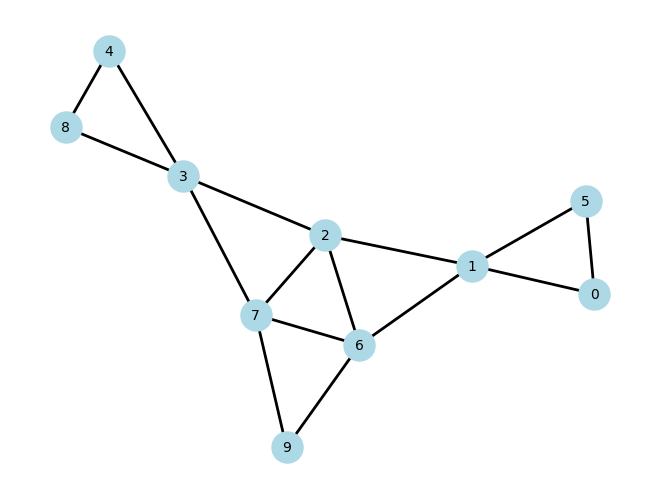

In [9]:
G=nx.Graph()
#adicionando os vertices
G.add_nodes_from([0,1,2,3,4,6,7,8,8])
#adicionando as arestas
edges = [(0,1), (0,5), (1,5), (1,2), (1,6), (2,3), (2,6),(2,7), (3,4), (3,7), (3,8), (4,8), (6,7), (6,9),(7,9)]
G.add_edges_from(edges)
# Visualizar o grafo
pos = nx.spring_layout(G)  # Layout do grafo
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2)
plt.show()

In [10]:
def hierholzer_algorithm(G):
    # Verificar se o grafo é euleriano
    if not nx.is_eulerian(G):
        raise ValueError("O grafo não é euleriano.")

    # Cria uma cópia do grafo para manipulação
    G_copy = G.copy()
    start_vertex = next(iter(G_copy.nodes()))
    circuit = []

    def find_cycle(v):
        stack = [v]
        cycle = []
        while stack:
            u = stack[-1]
            if G_copy.degree[u] == 0:
                cycle.append(stack.pop())
            else:
                for neighbor in list(G_copy.neighbors(u)):
                    if G_copy.has_edge(u, neighbor):
                        G_copy.remove_edge(u, neighbor)
                        stack.append(neighbor)
                        break
        return cycle

    # Encontrar o ciclo euleriano
    while len(G_copy.edges()) > 0:
        cycle = find_cycle(start_vertex)
        circuit += cycle

    return circuit

Ciclo Euleriano: [0, 5, 1, 6, 9, 7, 6, 2, 7, 3, 8, 4, 3, 2, 1, 0]


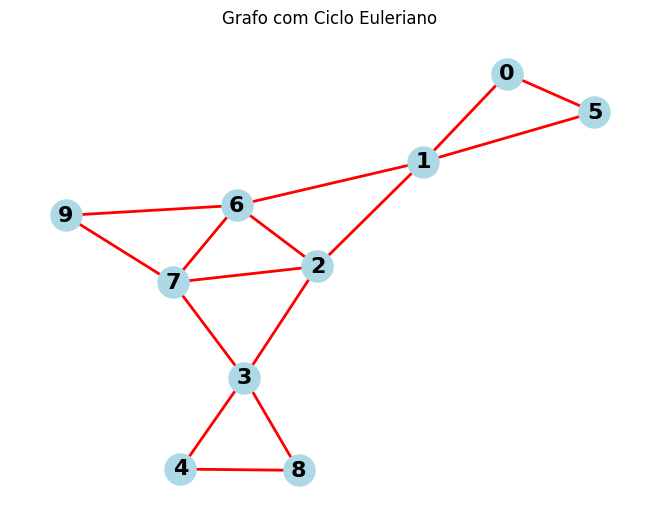

In [11]:
# Encontrar e exibir o ciclo euleriano usando o Algoritmo de Hierholzer
try:
    eulerian_cycle = hierholzer_algorithm(G)
    print("Ciclo Euleriano:", eulerian_cycle)

    # Visualizar o grafo e o ciclo euleriano
    pos = nx.spring_layout(G)  # Layout para o grafo
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16, font_weight='bold')

    # Desenhar o ciclo euleriano
    eulerian_cycle_edges = list(zip(eulerian_cycle, eulerian_cycle[1:] + [eulerian_cycle[0]]))
    nx.draw_networkx_edges(G, pos, edgelist=eulerian_cycle_edges, edge_color='red', width=2)

    plt.title("Grafo com Ciclo Euleriano")
    plt.show()

except ValueError as e:
    print(e)

In [15]:
def algoritmo_de_hierholzer(G):
    # Inicialização
    g_red = G.copy()
    vertice_inicial = list(g_red.nodes())[0]
    ciclo_euleriano = [vertice_inicial]

    # Enquanto houver arestas não exploradas
    while len(g_red.edges()) > 0:
        # Encontrar um vértice com arestas não exploradas
        vertice_atual = ciclo_euleriano[-1]
        if g_red.degree(vertice_atual) == 0:
            ciclo_euleriano.append(vertice_atual)
            continue
        
        # Encontrar um ciclo auxiliar começando e terminando no vértice atual
        ciclo_aux = [vertice_atual]
        while g_red.degree(ciclo_aux[-1]) > 0:
            proximo_vertice = list(g_red.neighbors(ciclo_aux[-1]))[0]
            ciclo_aux.append(proximo_vertice)
            g_red.remove_edge(ciclo_aux[-2], ciclo_aux[-1])
        
        # Atualizar o ciclo euleriano
        ciclo_euleriano = ciclo_euleriano[:-1] + ciclo_aux + [vertice_atual]

    return ciclo_euleriano

# Executando o algoritmo de Hierholzer
ciclo_euleriano = algoritmo_de_hierholzer(G)

# Exibindo o resultado
print("Ciclo Euleriano:", ciclo_euleriano)

# Visualizando o grafo e o ciclo euleriano
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
nx.draw_networkx_edges(g, pos, edgelist=list(zip(ciclo_euleriano[:-1], ciclo_euleriano[1:])), edge_color='red', width=2)
plt.title("Grafo e Ciclo Euleriano")
plt.show()

KeyboardInterrupt: 